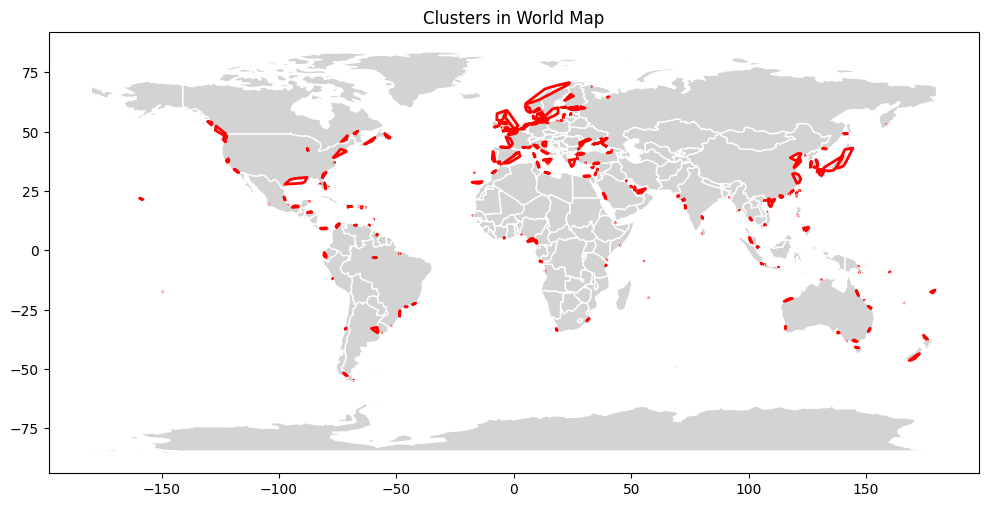

     label                                           geometry  ship_cnts  \
0        0  POLYGON ((26.37833 40.10567, 26.37833 40.10575...        365   
1        1  POLYGON ((120.70315 28.02241, 120.60143 28.084...       9995   
2        2  POLYGON ((28.57499 43.79636, 28.09596 44.27226...        659   
3        3  POLYGON ((3.83075 51.26287, 3.54874 51.40173, ...      10000   
4        4  POLYGON ((3.72926 51.00517, 2.75944 51.13716, ...      10000   
..     ...                                                ...        ...   
209    209  POLYGON ((117.10013 23.55496, 117.09911 23.555...        246   
210    210  POLYGON ((30.61137 36.83639, 30.60557 36.83706...         79   
211    211  POLYGON ((113.49961 22.0387, 113.52309 22.1695...        609   
212    212  POLYGON ((45.33603 2.02351, 45.336 2.02352, 45...         98   
213    213  POLYGON ((159.96132 -9.43172, 159.95895 -9.429...         57   

                                    country_water_body  \
0    Turkey_Sea of Marmara; M

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkb
import matplotlib.pyplot as plt

# 读取 feather 文件（注意相对路径）
# df = pd.read_feather('../Network Analysis/result/clusters/cl_ru.feather')
df = pd.read_feather('../Network Analysis/result/clusters/cl_cv.feather')

# 将二进制的 geometry 列转换为 shapely 几何对象
df['geometry'] = df['geometry'].apply(wkb.loads)

# 构造 GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

# 从本地加载世界地图数据
world = gpd.read_file('data/countries.geo.json')

# 绘制世界地图和叠加多边形
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray', edgecolor='white')
gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)
plt.title("Clusters in World Map")
plt.show()

print(gdf)